In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
adults = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/f1b342e4-8695-469a-b70f-865d6750e05a/adult_dataset.csv')
adults.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [3]:
adults[adults.workclass == '?'].shape

(1836, 15)

In [4]:
adults.shape

(32561, 15)

In [5]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
adults.describe()

age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [7]:
adults[adults.occupation == '?'].shape

(1843, 15)

In [8]:
adults[((adults.occupation == '?') & (adults.workclass == '?'))].shape

(1836, 15)

In [9]:
adults = adults[adults.occupation != '?']
adults = adults[adults.workclass != '?']
adults.shape

(30718, 15)

In [10]:
adults.workclass.unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

In [11]:
for _col in adults.columns:
    print(adults[_col].unique())

[82 54 41 34 38 74 68 45 52 32 46 57 22 37 29 61 51 21 33 49 23 59 60 63
 53 44 43 48 71 73 40 50 42 39 55 47 31 58 62 36 67 72 78 83 26 70 27 35
 81 66 65 25 28 56 69 20 30 90 24 64 75 19 77 80 18 17 79 76 88 84 85 86]
['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay']
[132870 140359 264663 ...  84661 257302 201490]
['HS-grad' '7th-8th' 'Some-college' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
[ 9  4 10  6 16 15 13 14  7 12 11  2  3  8  5  1]
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
['Exec-managerial' 'Machine-op-inspct' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Armed-Forces'
 'Priv-house-serv']
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 

## Data preparation: 

In [12]:
# ===> remove columns which are ?
adults[adults['native.country'] == "?"].shape

(556, 15)

In [13]:
adults = adults[adults['native.country'] != "?"]

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
# help(adults.select_dtypes)
cate_data = adults.select_dtypes(include=['object'])
cate_data.head()

workclass     education marital.status         occupation   relationship  \
1   Private       HS-grad        Widowed    Exec-managerial  Not-in-family   
3   Private       7th-8th       Divorced  Machine-op-inspct      Unmarried   
4   Private  Some-college      Separated     Prof-specialty      Own-child   
5   Private       HS-grad       Divorced      Other-service      Unmarried   
6   Private          10th      Separated       Adm-clerical      Unmarried   

    race     sex native.country income  
1  White  Female  United-States  <=50K  
3  White  Female  United-States  <=50K  
4  White  Female  United-States  <=50K  
5  White  Female  United-States  <=50K  
6  White    Male  United-States  <=50K

In [16]:
cata_data = cate_data.apply(encoder.fit_transform)

In [17]:
cata_data.head()

workclass  education  marital.status  occupation  relationship  race  sex  \
1          2         11               6           3             1     4    0   
3          2          5               0           6             4     4    0   
4          2         15               5           9             3     4    0   
5          2         11               0           7             4     4    0   
6          2          0               5           0             4     4    1   

   native.country  income  
1              38       0  
3              38       0  
4              38       0  
5              38       0  
6              38       0

In [18]:
adults.drop(columns=cata_data.columns, inplace=True, axis=1)
adults = pd.concat([adults, cata_data], axis=1)
adults.head()

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
1   82  132870              9             0          4356              18   
3   54  140359              4             0          3900              40   
4   41  264663             10             0          3900              40   
5   34  216864              9             0          3770              45   
6   38  150601              6             0          3770              40   

   workclass  education  marital.status  occupation  relationship  race  sex  \
1          2         11               6           3             1     4    0   
3          2          5               0           6             4     4    0   
4          2         15               5           9             3     4    0   
5          2         11               0           7             4     4    0   
6          2          0               5           0             4     4    1   

   native.country  income  
1              38       0  
3              38       0  
4              38       0  
5              38       0  
6              38       0

In [19]:
adults['income'] = adults['income'].astype('category')
adults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
fnlwgt            30162 non-null int64
education.num     30162 non-null int64
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
workclass         30162 non-null int64
education         30162 non-null int64
marital.status    30162 non-null int64
occupation        30162 non-null int64
relationship      30162 non-null int64
race              30162 non-null int64
sex               30162 non-null int64
native.country    30162 non-null int64
income            30162 non-null category
dtypes: category(1), int64(14)
memory usage: 3.5 MB


## Model Buliding: 

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
x = adults.drop(columns=['income'])
y = adults.income 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=99)

In [22]:
classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
y_pred = classifier.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
accuracy_score(y_pred=y_pred, y_true=y_test)

0.8504807161012267

In [26]:
confusion_matrix(y_pred=y_pred, y_true=y_test)

array([[6553,  314],
       [1039, 1143]])

In [27]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6867
           1       0.78      0.52      0.63      2182

   micro avg       0.85      0.85      0.85      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049



### Plotting the decision tree: 

In [28]:
from IPython.display import Image
import graphviz, pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

In [29]:
features = list(x_train.columns)
features

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [30]:
def construct_graph(_model, _oriantiation):
    dot_data = StringIO()
    export_graphviz(_model, out_file=dot_data, rotate=_oriantiation, feature_names=features, filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

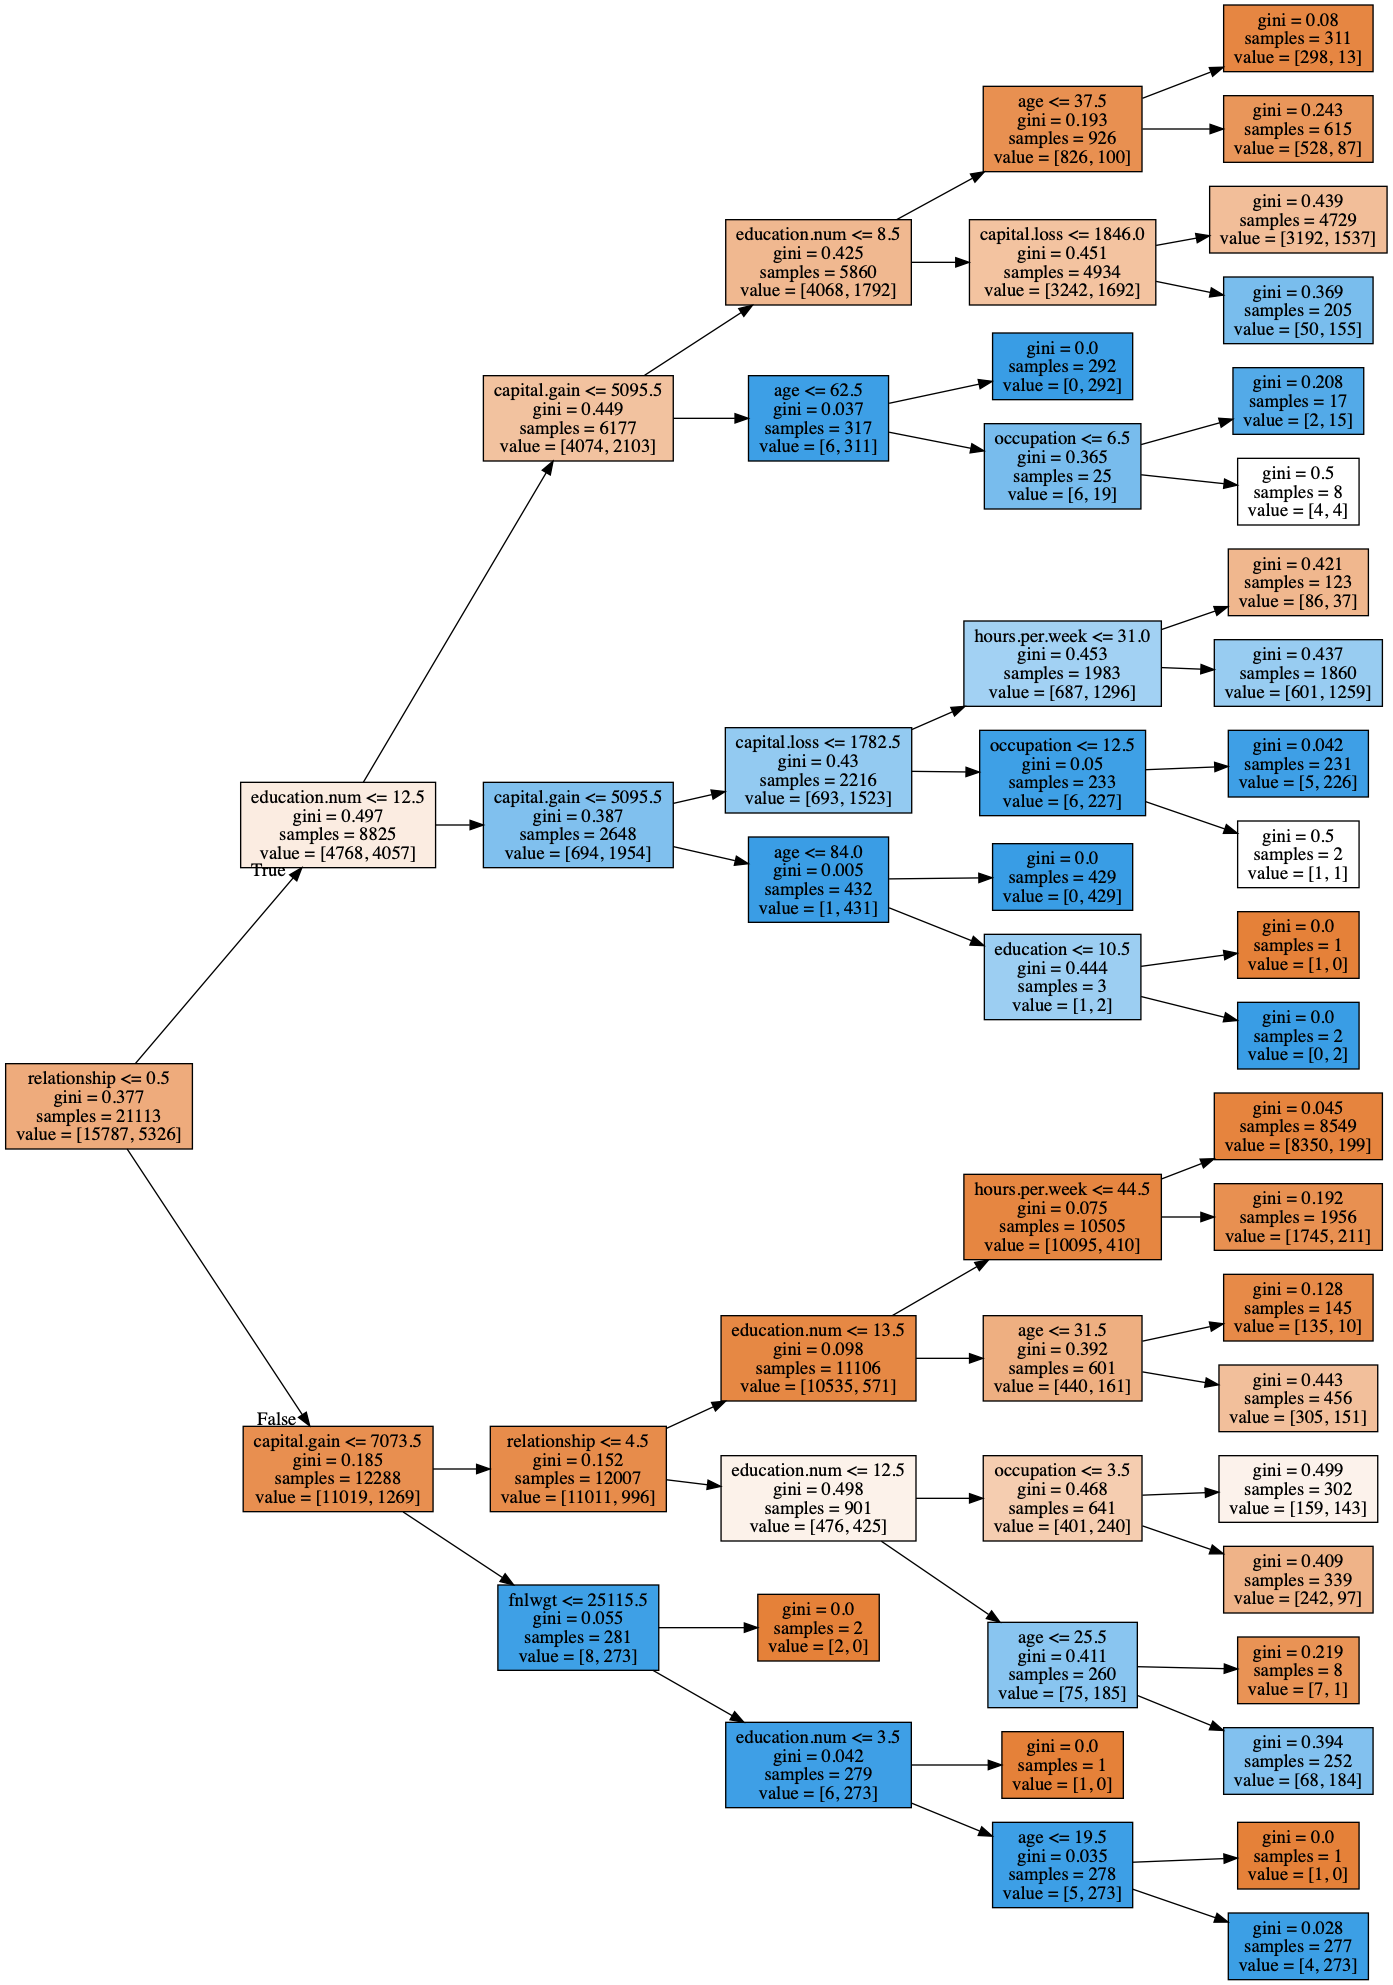

In [31]:
construct_graph(classifier, True)

### Hyper parameter Tuning:

#### Tuning max depth:

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [33]:
def apply_grid_search(n_splits, model_params):
    folds = KFold(n_splits=n_splits, shuffle=True, random_state=99)
    model = DecisionTreeClassifier()
    grid_search_model = GridSearchCV(model,
                                     param_grid=model_params,
                                     scoring='accuracy',
                                     cv=folds,
                                     verbose=True,
                                     n_jobs=-1,
                                     return_train_score=True)
    grid_search_model.fit(x_train, y_train)
    return grid_search_model

In [34]:
_model = apply_grid_search(5, {'max_depth': range(1, 20)})

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  88 out of  95 | elapsed:    7.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    7.2s finished


In [35]:
_results = pd.DataFrame(_model.cv_results_)
_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.029305      0.019239         0.003327        0.000837   
1        0.036974      0.007698         0.009101        0.008297   
2        0.079878      0.043465         0.013057        0.007274   
3        0.060997      0.022701         0.004072        0.001861   
4        0.040830      0.003300         0.002946        0.001230   
5        0.045953      0.002511         0.002269        0.000199   
6        0.056948      0.003985         0.003141        0.001171   
7        0.143595      0.021034         0.003220        0.001186   
8        0.068591      0.014601         0.003693        0.001818   
9        0.102921      0.035237         0.002899        0.000487   
10       0.154902      0.064936         0.004349        0.002690   
11       0.144818      0.024467         0.003459        0.000814   
12       0.158676      0.029977         0.006855        0.005658   
13       0.113920      0.011540         0.004320        0.000743   
14       0.102759      0.011914         0.003531        0.001045   
15       0.121476      0.009156         0.007903        0.006814   
16       0.124449      0.019855         0.003718        0.001273   
17       0.097627      0.008384         0.003649        0.000413   
18       0.110500      0.020452         0.003664        0.001737   

   param_max_depth             params  split0_test_score  split1_test_score  \
0                1   {'max_depth': 1}           0.757518           0.735496   
1                2   {'max_depth': 2}           0.825006           0.811035   
2                3   {'max_depth': 3}           0.840161           0.821928   
3                4   {'max_depth': 4}           0.844897           0.825953   
4                5   {'max_depth': 5}           0.846791           0.827137   
5                6   {'max_depth': 6}           0.852711           0.834715   
6                7   {'max_depth': 7}           0.853659           0.838503   
7                8   {'max_depth': 8}           0.855553           0.835662   
8                9   {'max_depth': 9}           0.850343           0.831163   
9               10  {'max_depth': 10}           0.855079           0.836135   
10              11  {'max_depth': 11}           0.855316           0.835425   
11              12  {'max_depth': 12}           0.855316           0.836609   
12              13  {'max_depth': 13}           0.850107           0.830926   
13              14  {'max_depth': 14}           0.844897           0.821928   
14              15  {'max_depth': 15}           0.837793           0.825716   
15              16  {'max_depth': 16}           0.835899           0.818376   
16              17  {'max_depth': 17}           0.833057           0.816481   
17              18  {'max_depth': 18}           0.829268           0.815297   
18              19  {'max_depth': 19}           0.829979           0.816008   

    split2_test_score  split3_test_score  ...  mean_test_score  \
0            0.745678           0.758645  ...         0.747738   
1            0.813403           0.833965  ...         0.819969   
2            0.826900           0.849834  ...         0.834320   
3            0.836372           0.853387  ...         0.839672   
4            0.840161           0.860493  ...         0.842751   
5            0.834004           0.861677  ...         0.845356   
6            0.841345           0.863098  ...         0.848293   
7            0.838977           0.856466  ...         0.846445   
8            0.839214           0.858598  ...         0.844788   
9            0.841582           0.857650  ...         0.846824   
10           0.842292           0.858124  ...         0.846303   
11           0.840398           0.852913  ...         0.844598   
12           0.840871           0.846518  ...         0.840241   
13           0.831399           0.844623  ...         0.834888   
14           0.828321           0.831360  ...         0.829726   
15    

In [36]:
def plot_graph(results, _key):
    plt.figure()
    plt.plot(results[_key],
             results['mean_train_score'],
             label="Training Accuracy")
    plt.plot(results[_key],
             results['mean_test_score'],
             label="Test Accuracy")
    plt.xlabel("Depth of the tree")
    plt.ylabel("Accuracy")
    plt.show()

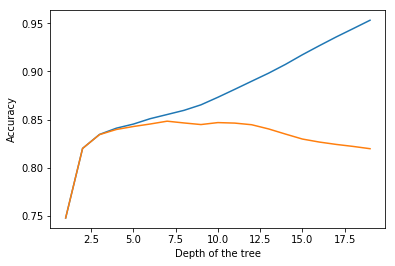

In [37]:
plot_graph(_results, 'param_max_depth')

### Tuning max min_samples_leaf:

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    4.8s finished


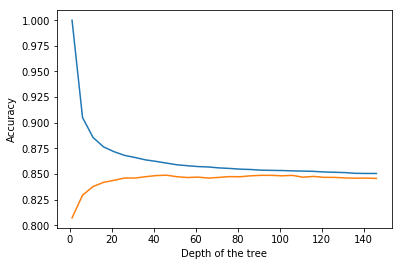

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.143107      0.017210         0.005773        0.002059   
1        0.119594      0.010294         0.005673        0.004654   
2        0.129668      0.009596         0.005444        0.004056   
3        0.105501      0.006690         0.003306        0.000664   
4        0.102548      0.016309         0.002962        0.000155   
5        0.083188      0.006705         0.004483        0.003342   
6        0.081802      0.008079         0.002398        0.000342   
7        0.103893      0.010287         0.005368        0.002448   
8        0.096950      0.005523         0.003542        0.000637   
9        0.098802      0.007853         0.003213        0.001431   
10       0.099672      0.005247         0.003367        0.001376   
11       0.074473      0.006160         0.003207        0.000598   
12       0.074764      0.013823         0.002496        0.000103   
13       0.094608      0.012089         0.004137        0.001153   
14       0.086575      0.015437         0.004144        0.001079   
15       0.073078      0.008053         0.003113        0.000542   
16       0.116598      0.068532         0.006571        0.005662   
17       0.126148      0.025823         0.005937        0.002657   
18       0.105148      0.009036         0.003235        0.000733   
19       0.087374      0.009352         0.003514        0.001463   
20       0.075378      0.005352         0.004700        0.002266   
21       0.084398      0.015429         0.002910        0.000641   
22       0.070255      0.004813         0.006051        0.003505   
23       0.077045      0.012183         0.006129        0.003951   
24       0.070276      0.005004         0.002995        0.000725   
25       0.058395      0.007059         0.002746        0.000354   
26       0.058334      0.007169         0.002868        0.000397   
27       0.051995      0.006673         0.002257        0.000492   
28       0.057072      0.003885         0.002177        0.000477   
29       0.056656      0.010682         0.002523        0.000471   

   param_min_samples_leaf                     params  split0_test_score  \
0                       1    {'min_samples_leaf': 1}           0.811982   
1                       6    {'min_samples_leaf': 6}           0.835188   
2                      11   {'min_samples_leaf': 11}           0.844187   
3                      16   {'min_samples_leaf': 16}           0.850343   
4                      21   {'min_samples_leaf': 21}           0.844423   
5                      26   {'min_samples_leaf': 26}           0.846791   
6                      31   {'min_samples_leaf': 31}           0.846081   
7                      36   {'min_samples_leaf': 36}           0.851527   
8                      41   {'min_samples_leaf': 41}           0.853422   
9                      46   {'min_samples_leaf': 46}           0.856974   
10                     51   {'min_samples_leaf': 51}           0.852948   
11                     56   {'min_samples_leaf': 56}           0.852238   
12                     61   {'min_samples_leaf': 61}           0.855079   
13                     66   {'min_samples_leaf': 66}           0.855079   
14                     71   {'min_samples_leaf': 71}           0.855316   
15                     76   {'min_samples_leaf': 76}           0.856027   
16                     81   {'min_samples_leaf': 81}           0.855079   
17                     86   {'min_samples_leaf': 86}           0.855079   
18                     91   {'min_samples_leaf': 91}           0.854606   
19                     96   {'min_samples_leaf': 96}           0.854606   
20                    101  {'min_samples_leaf': 101}           0.854606   
21                    106  {'min_samples_leaf': 106}           0.855079   
22                    111  {'min_samples_leaf': 111}           0.852475   
23                    116  {'min_samples_leaf': 116}           0.852475   
24                  

In [38]:
_model = apply_grid_search(5, {'min_samples_leaf': range(1, 150, 5)})
min_samples_results = pd.DataFrame(_model.cv_results_)
plot_graph(min_samples_results, 'param_min_samples_leaf')
min_samples_results

Note: As we increase the min_samples in leaf accuracy may decrease but model becomes more stable.

### Tuning min_samples_split:

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.2s finished


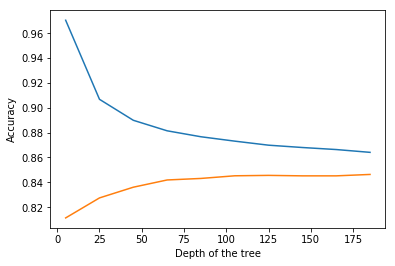

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.105727      0.008813         0.004133        0.001576   
1       0.089078      0.004853         0.003304        0.000549   
2       0.082061      0.005824         0.002686        0.000393   
3       0.092381      0.009344         0.002610        0.000191   
4       0.086633      0.009317         0.002782        0.000099   
5       0.086194      0.009132         0.002438        0.000521   
6       0.081853      0.009950         0.002826        0.000794   
7       0.079504      0.004315         0.002424        0.000719   
8       0.080859      0.008798         0.002298        0.000775   
9       0.074061      0.009382         0.002846        0.001024   

  param_min_samples_split                      params  split0_test_score  \
0                       5    {'min_samples_split': 5}           0.820270   
1                      25   {'min_samples_split': 25}           0.834241   
2                      45   {'min_samples_split': 45}           0.834478   
3                      65   {'min_samples_split': 65}           0.844423   
4                      85   {'min_samples_split': 85}           0.844897   
5                     105  {'min_samples_split': 105}           0.846555   
6                     125  {'min_samples_split': 125}           0.848449   
7                     145  {'min_samples_split': 145}           0.846555   
8                     165  {'min_samples_split': 165}           0.846791   
9                     185  {'min_samples_split': 185}           0.852475   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.803457           0.810561           0.816201  ...   
1           0.823348           0.825953           0.833018  ...   
2           0.834478           0.836609           0.843676  ...   
3           0.835425           0.840871           0.849360  ...   
4           0.836609           0.840161           0.853387  ...   
5           0.838267           0.842529           0.857177  ...   
6           0.839924           0.840871           0.855045  ...   
7           0.839451           0.839924           0.855992  ...   
8           0.837556           0.841345           0.855992  ...   
9           0.834241           0.843713           0.856703  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.811348        0.006197               10            0.969213   
1         0.827452        0.005324                9            0.904322   
2         0.836073        0.004188                8            0.889224   
3         0.841898        0.004716                7            0.880403   
4         0.843130        0.005763                6            0.875844   
5         0.845261        0.006514                3            0.873357   
6         0.845593        0.005578                2            0.869213   
7         0.845214        0.006005                4            0.866548   
8         0.845214        0.006212                4            0.865305   
9         0.846351        0.007762                1            0.862818   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.972647            0.970337            0.970990   
1            0.905980            0.909473            0.905275   
2            0.889520            0.893665            0.886863   
3            0.881409            0.884133            0.879226   
4            0.876377            0.878863            0.874489   
5            0.872351            0.875015            0.871352   
6            0.869568            0.872291            0.868036   
7            0.868324            0.870634            0.866734   
8            0.866489            0.869864            0.865076   
9            0.864654            0.868088            0.860695   

   split4_train_score  mean_train_score  std_train_score  
0            0.969274          0.970492         0.001268  
1            0.909123         

In [42]:
_model = apply_grid_search(5, {'min_samples_split': range(5, 200, 20)})
min_samples_results = pd.DataFrame(_model.cv_results_)
plot_graph(min_samples_results, 'param_min_samples_split')
min_samples_results

In [44]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}
_model = apply_grid_search(5, param_grid)
grid_search = pd.DataFrame(_model.cv_results_)
grid_search

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.5s finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.055532      0.010007         0.003939        0.002085   
1        0.038894      0.001008         0.002469        0.000303   
2        0.039173      0.003557         0.002355        0.000571   
3        0.048880      0.008330         0.003175        0.000968   
4        0.066176      0.012481         0.002093        0.000401   
5        0.066439      0.008057         0.003143        0.001545   
6        0.066661      0.004494         0.004116        0.002098   
7        0.060179      0.002631         0.002190        0.000310   
8        0.038549      0.005133         0.002201        0.000376   
9        0.033473      0.005929         0.002091        0.000066   
10       0.033840      0.003797         0.002040        0.000291   
11       0.031918      0.002437         0.001731        0.000238   
12       0.058048      0.004067         0.003016        0.001127   
13       0.058298      0.007972         0.002238        0.000479   
14       0.054251      0.003383         0.002178        0.000292   
15       0.043804      0.005853         0.002286        0.000819   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     50   
1          entropy               5                     50   
2          entropy               5                    100   
3          entropy               5                    100   
4          entropy              10                     50   
5          entropy              10                     50   
6          entropy              10                    100   
7          entropy              10                    100   
8             gini               5                     50   
9             gini               5                     50   
10            gini               5                    100   
11            gini               5                    100   
12            gini              10                     50   
13            gini              10                     50   
14            gini              10                    100   
15            gini              10                    100   

   param_min_samples_split                                             params  \
0                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
5                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
6                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
7                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
8                       50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
9                      100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
10                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
11                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
12                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
13                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
14                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
15                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

    split0_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0            0.847028  ...         0.842325        0.009168               13   
1            0.847028  ...         0.842325        0.009168               13   
2            0.847028  ...         0.841898        0.009197               15   
3            0.847028  ...         0.841898        0.009197               15   
4            0.855316  ...     

In [47]:
print("best accuracy", _model.best_score_)
_model.best_estimator_

best accuracy 0.8490503481267465


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Build model with best parameter:

In [48]:
dt_classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=50, min_samples_leaf=50, criterion='gini', random_state=100)
dt_classifier.fit(x_train, y_train)
y_pred = dt_classifier.predict(x_test)
print(classification_report(y_true=y_test, y_pred=y_pred))
accuracy_score(y_true=y_test, y_pred=y_pred)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6867
           1       0.73      0.60      0.66      2182

   micro avg       0.85      0.85      0.85      9049
   macro avg       0.81      0.77      0.78      9049
weighted avg       0.84      0.85      0.85      9049



0.850922753895458

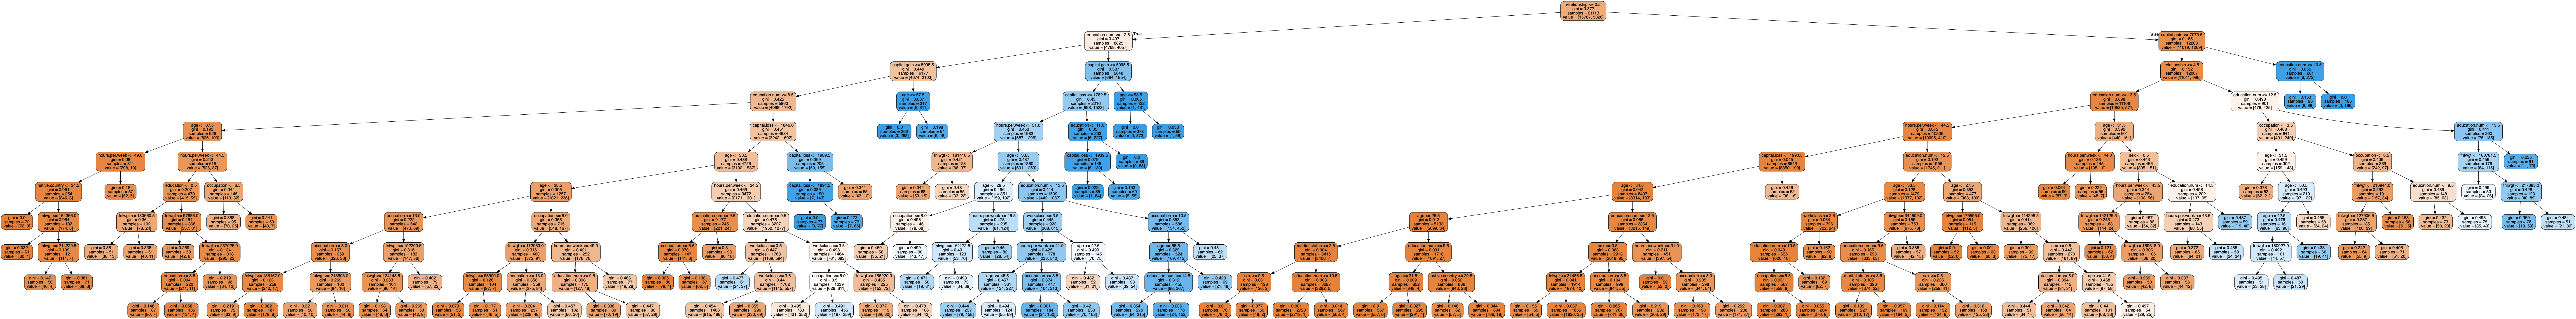

In [51]:
dot_data = StringIO()
export_graphviz(dt_classifier, out_file=dot_data, feature_names=features,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### Model is too complex lets try to decrease the depth level and see:

In [52]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(x_train, y_train)

# score
print(clf_gini.score(x_test,y_test))

0.8393192617968837


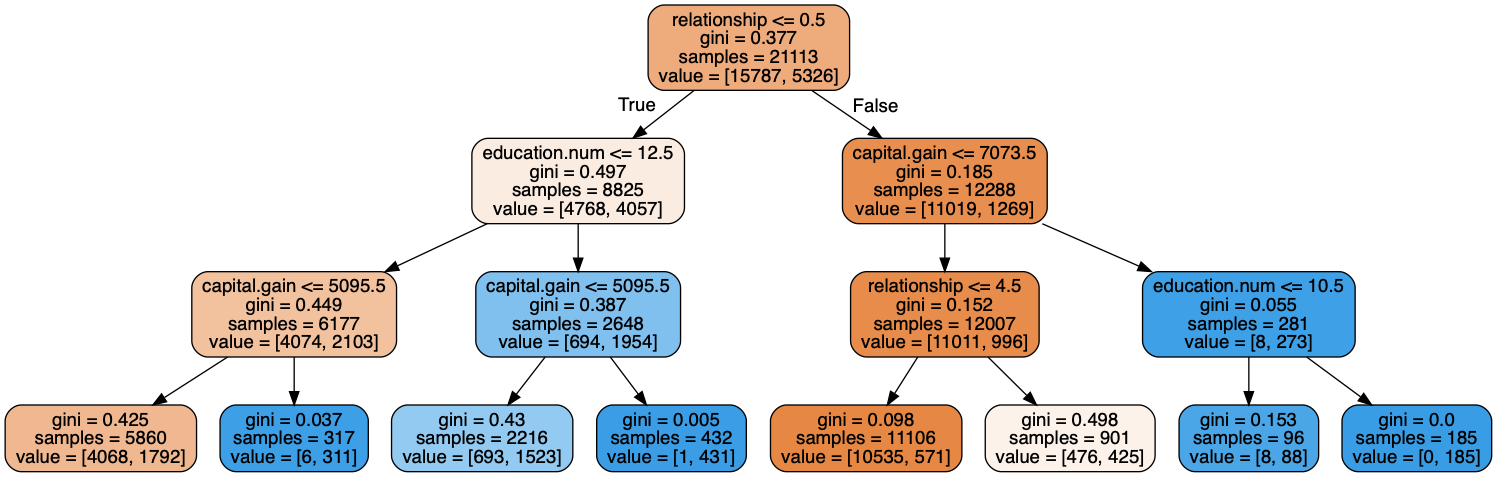

In [53]:
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [55]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6867
           1       0.77      0.47      0.59      2182

   micro avg       0.84      0.84      0.84      9049
   macro avg       0.81      0.71      0.74      9049
weighted avg       0.83      0.84      0.82      9049



In [57]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.8393192617968837